In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import ast

In [2]:
path = '../../results/halos_matched_disk_noduplicates.csv'
df = pd.read_csv(path)
df.head()

subhalo_TNG50-1  halo_TNG50-1  Mvir_TNG50-1  halo_TNG50-3  Mvir_TNG50-3  \
0         117251.0             3   3470.526367           3.0   3491.555176   
1         143881.0             4   3142.989746           4.0   3239.478027   
2         167393.0             5   1859.250610           5.0   1816.254150   
3         184932.0             6   3027.909180           6.0   3017.573486   
4         198183.0             7   2737.067871           7.0   2795.508057   

   has_disk  
0         1  
1         1  
2         1  
3         1  
4         1

In [3]:
df['has_disk'].value_counts() 

has_disk
1    107
0     60
Name: count, dtype: int64

In [4]:
halos = df.copy()
halos.drop(columns=['halo_TNG50-1','subhalo_TNG50-1'], inplace=True)
halos=halos.sort_values('halo_TNG50-3')
halos.reset_index(drop=True, inplace=True)
halos.head()

Mvir_TNG50-1  halo_TNG50-3  Mvir_TNG50-3  has_disk
0   7466.339355           1.0   7462.923340         1
1   5243.999512           2.0   5181.124023         1
2   3470.526367           3.0   3491.555176         1
3   3142.989746           4.0   3239.478027         1
4   1859.250610           5.0   1816.254150         1

In [5]:
#leer archivo history
path = '../../results/halos_history.csv'
history = pd.read_csv(path)

history.head()

halo_id  snap    z  epoch          Mdom          Mvir         Rvir
0        0    99  0.0      0  14868.514825  15079.097656  1082.225708
1        0    67  0.5      1  11816.643740   7356.986328   961.575439
2        1    50  1.0      2   6773.379776   4175.038086   831.712219
3        0    40  1.5      3   5495.054348   2296.211914   694.748718
4        0    33  2.0      4   6318.500934   1773.746460   643.600769

In [6]:
# Encontrar los índices donde snap == 99 (inicio de cada halo)
mask_z0 = history['snap'] == 99
start_idxs = history.index[mask_z0].tolist()
start_idxs.append(len(history))  # Añadir el final para el último halo

history_grouped = []
for i in range(len(start_idxs) - 1):
    group = history.iloc[start_idxs[i]:start_idxs[i+1]]
    history_grouped.append({
    'halo_id': np.array(group['halo_id']),
    'snap':   np.array(group['snap']),
    'z':      np.array(group['z']),
    'Mdom':   np.array(group['Mdom']),
    'Mvir':   np.array(group['Mvir']),
    'Rvir':   np.array(group['Rvir']),
})

history_accretion = pd.DataFrame(history_grouped)

In [7]:
# Filtrar history_accretion para mantener solo filas cuyo primer halo_id está en halos['halo_TNG50-3']
valid_ids = set(halos['halo_TNG50-3'])
mask = history_accretion['halo_id'].apply(lambda ids: ids[0] in valid_ids)
history_accretion = history_accretion[mask].reset_index(drop=True)

In [8]:
history_accretion['has_disk'] = np.nan

for i, row in history_accretion.iterrows():
    halo_id = row['halo_id'][0]
    has_disk = halos.loc[halos['halo_TNG50-3'] == halo_id, 'has_disk'].values[0]
    history_accretion.at[i, 'has_disk'] = has_disk

In [9]:
history_accretion.head()

halo_id                          snap  \
0        [1, 1, 3, 2, 2, 0, 5]  [99, 67, 50, 40, 33, 25, 21]   
1      [2, 2, 2, 3, 4, 14, 55]  [99, 67, 50, 40, 33, 25, 21]   
2  [3, 3, 6, 70, 86, 273, 525]  [99, 67, 50, 40, 33, 25, 21]   
3  [4, 10, 25, 39, 35, 25, 42]  [99, 67, 50, 40, 33, 25, 21]   
4      [5, 8, 10, 8, 6, 9, 19]  [99, 67, 50, 40, 33, 25, 21]   

                                       z  \
0  [0.0, 0.5, 1.0, 1.5, 2.0, 3.01, 4.01]   
1  [0.0, 0.5, 1.0, 1.5, 2.0, 3.01, 4.01]   
2  [0.0, 0.5, 1.0, 1.5, 2.0, 3.01, 4.01]   
3  [0.0, 0.5, 1.0, 1.5, 2.0, 3.01, 4.01]   
4  [0.0, 0.5, 1.0, 1.5, 2.0, 3.01, 4.01]   

                                                Mdom  \
0  [5440.24179314, 5054.11909167, 4266.42672636, ...   
1  [3813.40609525, 4110.59379217, 4712.45805638, ...   
2  [3095.05581398, 2544.06357694, 1168.18440738, ...   
3  [2720.43254376, 773.00642904, 586.24221915, 41...   
4  [1798.46575982, 1795.23723497, 1503.6965385, 2...   

                                                Mvir  \
0  [7462.92333984, 4386.95605469, 2615.14013672, ...   
1  [5181.12402344, 3789.87963867, 2939.70385742, ...   
2  [3491.55517578, 2114.04174805, 838.90289307, 1...   
3  [3239.47802734, 697.746521, 454.64538574, 225....   
4  [1816.25415039, 1329.79504395, 729.63494873, 6...   

                                                Rvir  has_disk  
0  [856.03497314, 809.35626221, 711.62109375, 661...       1.0  
1  [758.01678467, 770.84423828, 739.92736816, 581...       1.0  
2  [664.56970215, 634.54083252, 487.16415405, 276...       1.0  
3  [648.16558838, 438.52362061, 397.18139648, 320...       1.0  
4  [534.46331787, 543.67944336, 465.01348877, 465...       1.0

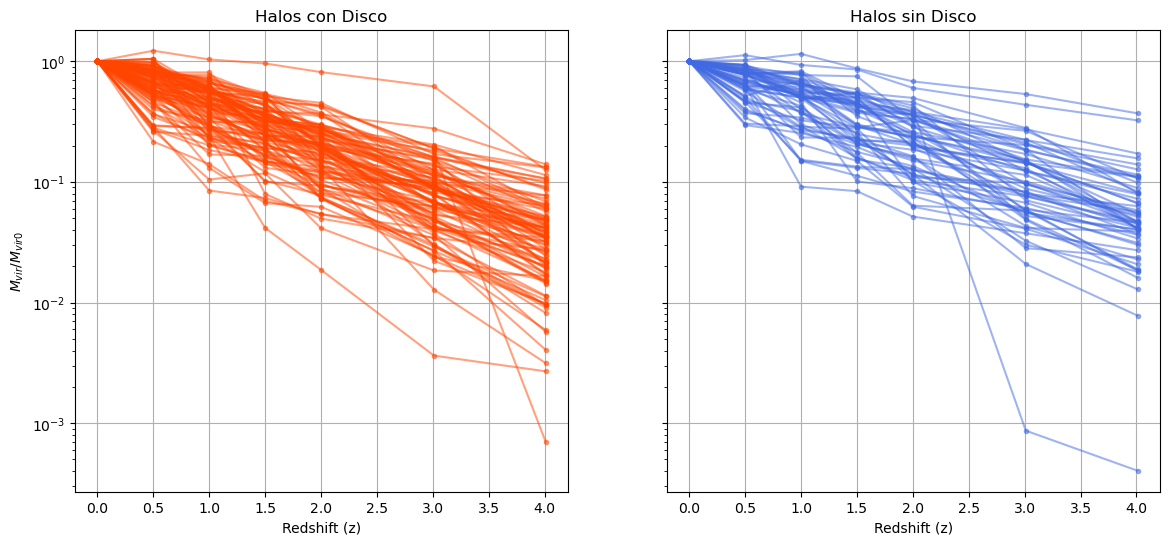

In [10]:
#grafica de Mvir vs z para halos con y sin disco
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Halos con disco
mask_disk = history_accretion['has_disk'] == True
for i, row in history_accretion[mask_disk].iterrows():
    #dividiendo por la masa en z=0
    axs[0].plot(row['z'], row['Mvir']/row['Mvir'][row['z'] == 0], marker='.', linestyle='-', alpha=0.5, color='orangered')
axs[0].set_title('Halos con Disco')
axs[0].set_xlabel('Redshift (z)')
axs[0].set_ylabel('$M_{vir}$/$M_{vir0}$')
axs[0].set_yscale('log')
axs[0].grid(True)

# Halos sin disco
mask_nodisk = history_accretion['has_disk'] == False
for i, row in history_accretion[mask_nodisk].iterrows():
    axs[1].plot(row['z'], row['Mvir']/row['Mvir'][row['z'] == 0], marker='.', linestyle='-', alpha=0.5, color='royalblue')
axs[1].set_title('Halos sin Disco')
axs[1].set_xlabel('Redshift (z)')
axs[1].set_yscale('log')
axs[1].grid(True)

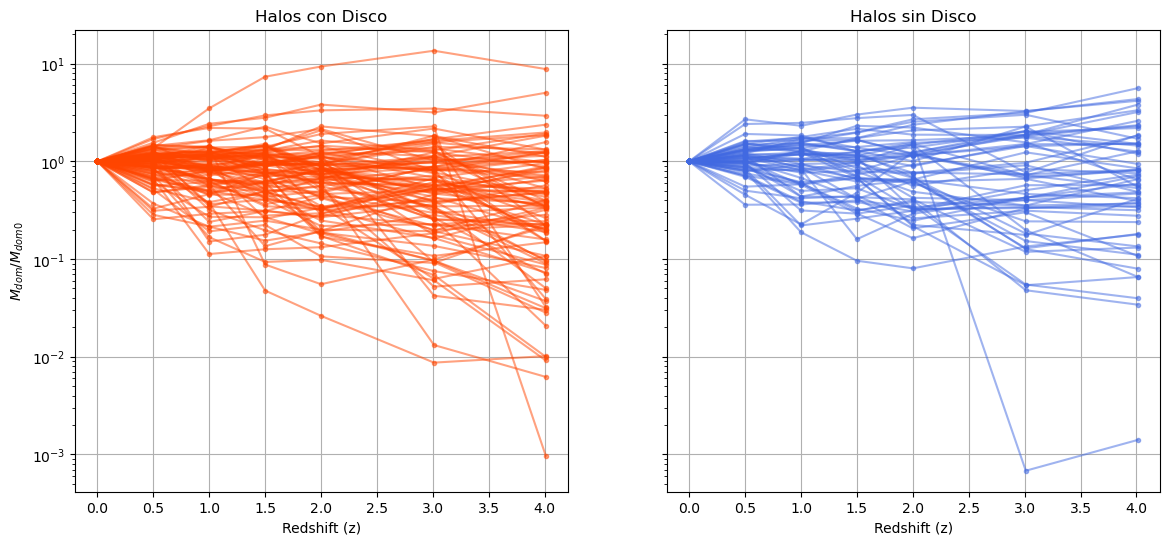

In [11]:
#grafica de Mdom vs z para halos con y sin disco
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Halos con disco
mask_disk = history_accretion['has_disk'] == True
for i, row in history_accretion[mask_disk].iterrows():
    #dividiendo por la masa en z=0
    axs[0].plot(row['z'], row['Mdom']/row['Mdom'][row['z'] == 0], marker='.', linestyle='-', alpha=0.5, color='orangered')
axs[0].set_title('Halos con Disco')
axs[0].set_xlabel('Redshift (z)')
axs[0].set_ylabel('$M_{dom}$/$M_{dom0}$')
axs[0].set_yscale('log')
axs[0].grid(True)

# Halos sin disco
mask_nodisk = history_accretion['has_disk'] == False
for i, row in history_accretion[mask_nodisk].iterrows():
    axs[1].plot(row['z'], row['Mdom']/row['Mdom'][row['z'] == 0], marker='.', linestyle='-', alpha=0.5, color='royalblue')
axs[1].set_title('Halos sin Disco')
axs[1].set_xlabel('Redshift (z)')
axs[1].set_yscale('log')
axs[1].grid(True)

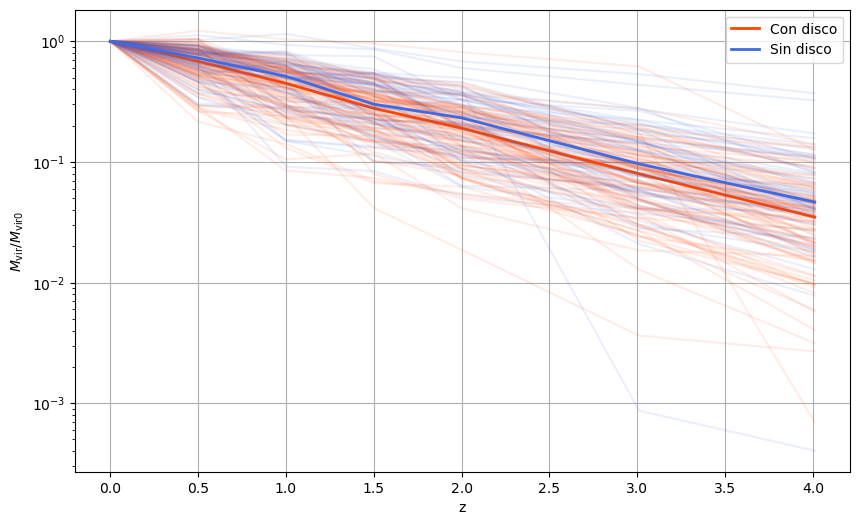

In [12]:
fig, ax = plt.subplots(figsize=(10,6))

# Funcion para graficar grupos
def plot_group(halos, color, label):
    # Historias individuales
    for i, row in halos.iterrows():
        z = np.array(row['z'])
        #normalizar por la masa en z=0
        mvir = np.array(row['Mvir'])/row['Mvir'][row['z'] == 0]
        ax.plot(z, mvir, color=color, alpha=0.1)

    # Mediana en cada z
    mvir_by_z = {}
    for i, row in halos.iterrows():
        for zz, m in zip(row['z'], row['Mvir']):
            if zz not in mvir_by_z:
                mvir_by_z[zz] = []
            #normalizar por la masa en z=0
            mvir_by_z[zz].append(m/row['Mvir'][row['z'] == 0])

    z_vals = sorted(mvir_by_z.keys())
    mvir_median = [np.median(mvir_by_z[zz]) for zz in z_vals]

    # Curva de la mediana
    ax.plot(z_vals, mvir_median, color=color, lw=2, label=label)

# Halos con disco
halos_disk = history_accretion[history_accretion['has_disk'] == 1]
plot_group(halos_disk, color='orangered', label='Con disco')

# Halos sin disco
halos_nodisk = history_accretion[history_accretion['has_disk'] == 0]
plot_group(halos_nodisk, color='royalblue', label='Sin disco')

ax.set_xlabel("z")
ax.set_ylabel(r"$M_{\rm vir}/M_{\rm vir0}$")
ax.legend()
ax.set_yscale('log')
ax.grid(True)
plt.show()


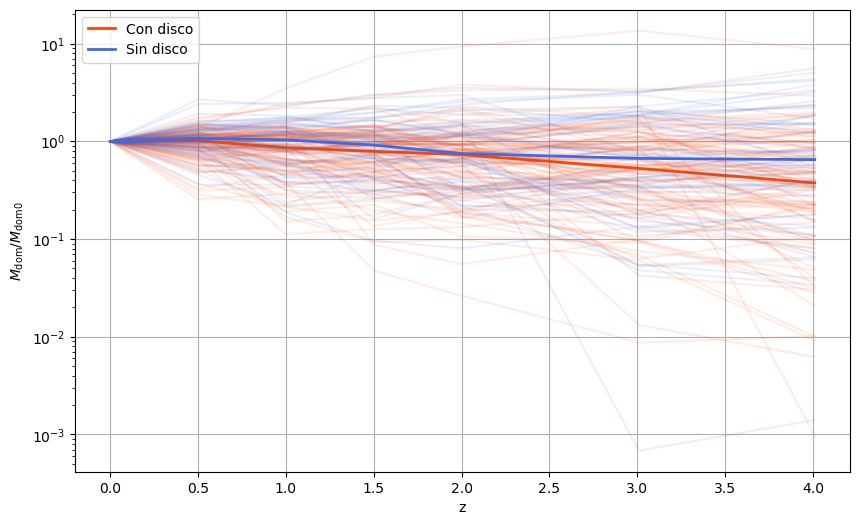

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

# Funcion para graficar grupos
def plot_group(halos, color, label):
    # Historias individuales
    for i, row in halos.iterrows():
        z = np.array(row['z'])
        #normalizar por la masa en z=0
        mdom = np.array(row['Mdom'])/row['Mdom'][row['z'] == 0]
        ax.plot(z, mdom, color=color, alpha=0.1)

    # Mediana en cada z
    mdom_by_z = {}
    for i, row in halos.iterrows():
        for zz, m in zip(row['z'], row['Mdom']):
            if zz not in mdom_by_z:
                mdom_by_z[zz] = []
            #normalizar por la masa en z=0
            mdom_by_z[zz].append(m/row['Mdom'][row['z'] == 0])

    z_vals = sorted(mdom_by_z.keys())
    mdom_median = [np.median(mdom_by_z[zz]) for zz in z_vals]

    # Curva de la mediana
    ax.plot(z_vals, mdom_median, color=color, lw=2, label=label)

# Halos con disco
halos_disk = history_accretion[history_accretion['has_disk'] == 1]
plot_group(halos_disk, color='orangered', label='Con disco')

# Halos sin disco
halos_nodisk = history_accretion[history_accretion['has_disk'] == 0]
plot_group(halos_nodisk, color='royalblue', label='Sin disco')

ax.set_xlabel("z")
ax.set_ylabel(r"$M_{\rm dom}/M_{\rm dom0}$")
ax.legend()
ax.set_yscale('log')
ax.grid(True)
plt.show()


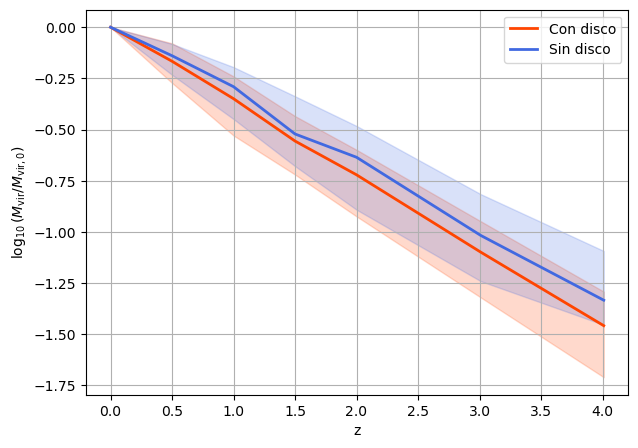

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))

# Función para graficar grupos con dispersión
def plot_group(halos, color, label):
    # Historias individuales
    for i, row in halos.iterrows():
        z = np.array(row['z'])
        mvir = np.array(row['Mvir']/row['Mvir'][row['z'] == 0])

    # Agrupar por z
    mvir_by_z = {}
    for i, row in halos.iterrows():
        for zz, m in zip(row['z'], row['Mvir']):
            if zz not in mvir_by_z:
                mvir_by_z[zz] = []
            mvir_by_z[zz].append(m/row['Mvir'][row['z'] == 0])

    z_vals = sorted(mvir_by_z.keys())
    mvir_median = [np.median(mvir_by_z[zz]) for zz in z_vals]
    mvir_q25    = [np.percentile(mvir_by_z[zz], 25) for zz in z_vals]
    mvir_q75    = [np.percentile(mvir_by_z[zz], 75) for zz in z_vals]

    # Mediana
    ax.plot(z_vals, np.log10(mvir_median), color=color, lw=2, label=label)
    # Banda de dispersión
    ax.fill_between(z_vals, np.log10(mvir_q25), np.log10(mvir_q75),
                    color=color, alpha=0.2)

# Halos con disco
halos_disk = history_accretion[history_accretion['has_disk'] == 1]
plot_group(halos_disk, color='orangered', label='Con disco')

# Halos sin disco
halos_nodisk = history_accretion[history_accretion['has_disk'] == 0]
plot_group(halos_nodisk, color='royalblue', label='Sin disco')

ax.set_xlabel("z")
ax.set_ylabel(r"$\log_{10}(M_{\rm vir}/M_{\rm vir,0})$")
ax.legend()
ax.grid(True)
plt.show()


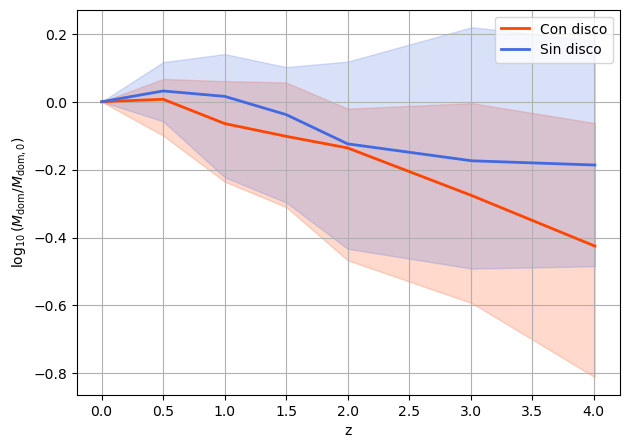

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, ax = plt.subplots(figsize=(7,5))

# --- Función auxiliar para graficar con dispersión ---
def plot_group(halos, color, label):
    # Historias individuales
    for i, row in halos.iterrows():
        z = np.array(row['z'])
        mdom = np.array(row['Mdom']/row['Mdom'][row['z'] == 0])

    # Agrupar por z
    mdom_by_z = {}
    for i, row in halos.iterrows():
        for zz, m in zip(row['z'], row['Mdom']):
            if zz not in mdom_by_z:
                mdom_by_z[zz] = []
            mdom_by_z[zz].append(m/row['Mdom'][row['z'] == 0])

    z_vals = sorted(mdom_by_z.keys())
    mdom_median = [np.median(mdom_by_z[zz]) for zz in z_vals]
    mdom_q25    = [np.percentile(mdom_by_z[zz], 25) for zz in z_vals]
    mdom_q75    = [np.percentile(mdom_by_z[zz], 75) for zz in z_vals]

    # Mediana
    ax.plot(z_vals, np.log10(mdom_median), color=color, lw=2, label=label)
    # Banda de dispersión
    ax.fill_between(z_vals, np.log10(mdom_q25), np.log10(mdom_q75),
                    color=color, alpha=0.2)

# Halos con disco
halos_disk = history_accretion[history_accretion['has_disk'] == 1]
plot_group(halos_disk, color='orangered', label='Con disco')

# Halos sin disco
halos_nodisk = history_accretion[history_accretion['has_disk'] == 0]
plot_group(halos_nodisk, color='royalblue', label='Sin disco')

ax.set_xlabel("z")
ax.set_ylabel(r"$\log_{10}(M_{\rm dom}/M_{\rm dom,0})$")
ax.legend()
ax.grid(True)
plt.show()


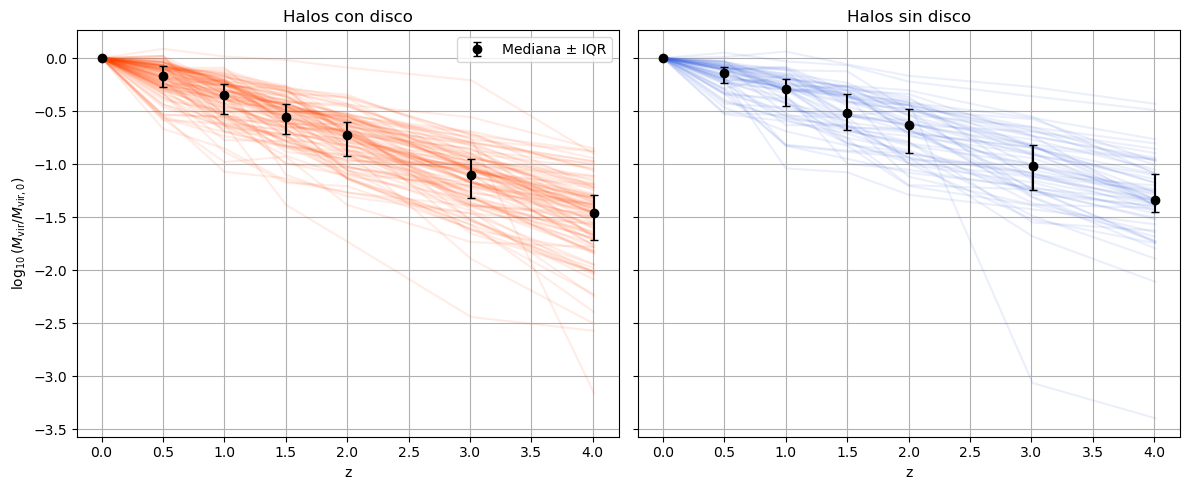

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12,5), sharey=True)

def plot_group(ax, halos, color, title):
    # Historias individuales
    for i, row in halos.iterrows():
        z = np.array(row['z'])
        mvir = np.array(row['Mvir'])/row['Mvir'][row['z'] == 0]
        ax.plot(z, np.log10(mvir), color=color, alpha=0.1)

    # Agrupar por z
    mvir_by_z = {}
    for i, row in halos.iterrows():
        for zz, m in zip(row['z'], row['Mvir']):
            if zz not in mvir_by_z:
                mvir_by_z[zz] = []
            mvir_by_z[zz].append(m/row['Mvir'][row['z'] == 0])

    z_vals = np.array(sorted(mvir_by_z.keys()))
    mvir_median = np.array([np.median(mvir_by_z[zz]) for zz in z_vals])
    mvir_q25    = np.array([np.percentile(mvir_by_z[zz], 25) for zz in z_vals])
    mvir_q75    = np.array([np.percentile(mvir_by_z[zz], 75) for zz in z_vals])

    # Puntos de la mediana con barras de error
    ax.errorbar(z_vals, np.log10(mvir_median),
                yerr=[np.log10(mvir_median)-np.log10(mvir_q25),
                      np.log10(mvir_q75)-np.log10(mvir_median)],
                fmt='o', color='black', ecolor='black', capsize=3,
                label='Mediana ± IQR')

    ax.set_title(title)
    ax.set_xlabel("z")
    ax.grid(True)

# Halos con disco
halos_disk = history_accretion[history_accretion['has_disk'] == 1]
plot_group(axs[0], halos_disk, color='orangered', title='Halos con disco')

# Halos sin disco
halos_nodisk = history_accretion[history_accretion['has_disk'] == 0]
plot_group(axs[1], halos_nodisk, color='royalblue', title='Halos sin disco')

axs[0].set_ylabel(r"$\log_{10}(M_{\rm vir}/M_{\rm vir,0})$")
axs[0].legend()

plt.tight_layout()
plt.show()



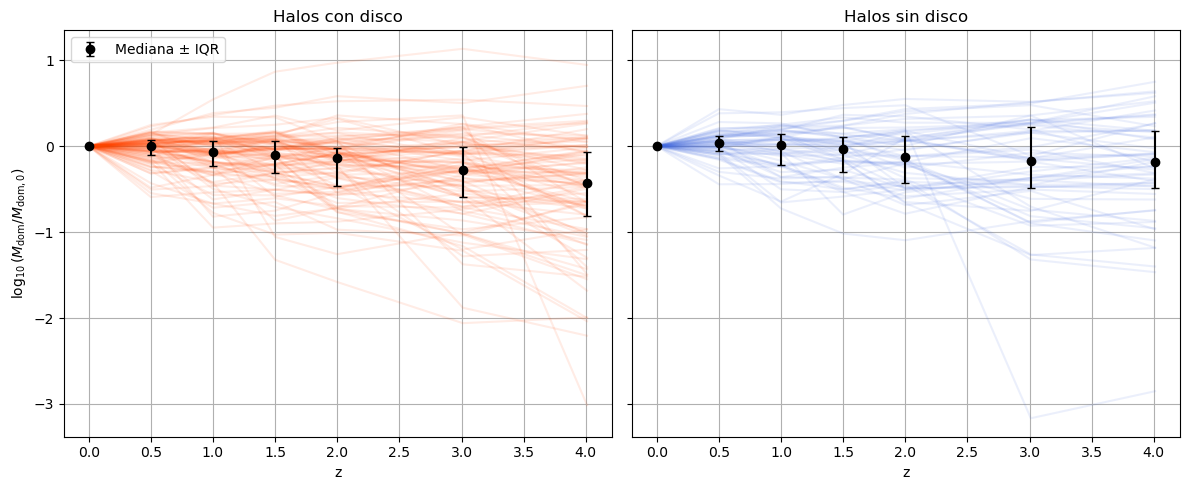

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12,5), sharey=True)

def plot_group(ax, halos, color, title):
    # Historias individuales
    for i, row in halos.iterrows():
        z = np.array(row['z'])
        mdom = np.array(row['Mdom'])/row['Mdom'][row['z'] == 0]
        ax.plot(z, np.log10(mdom), color=color, alpha=0.1)

    # Agrupar por z
    mdom_by_z = {}
    for i, row in halos.iterrows():
        for zz, m in zip(row['z'], row['Mdom']):
            if zz not in mdom_by_z:
                mdom_by_z[zz] = []
            mdom_by_z[zz].append(m/row['Mdom'][row['z'] == 0])

    z_vals = np.array(sorted(mdom_by_z.keys()))
    mdom_median = np.array([np.median(mdom_by_z[zz]) for zz in z_vals])
    mdom_q25    = np.array([np.percentile(mdom_by_z[zz], 25) for zz in z_vals])
    mdom_q75    = np.array([np.percentile(mdom_by_z[zz], 75) for zz in z_vals])

    # Puntos de la mediana con barras de error
    ax.errorbar(z_vals, np.log10(mdom_median),
                yerr=[np.log10(mdom_median)-np.log10(mdom_q25),
                      np.log10(mdom_q75)-np.log10(mdom_median)],
                fmt='o', color='black', ecolor='black', capsize=3,
                label='Mediana ± IQR')

    ax.set_title(title)
    ax.set_xlabel("z")
    ax.grid(True)

# Halos con disco
halos_disk = history_accretion[history_accretion['has_disk'] == 1]
plot_group(axs[0], halos_disk, color='orangered', title='Halos con disco')

# Halos sin disco
halos_nodisk = history_accretion[history_accretion['has_disk'] == 0]
plot_group(axs[1], halos_nodisk, color='royalblue', title='Halos sin disco')

axs[0].set_ylabel(r"$\log_{10}(M_{\rm dom}/M_{\rm dom,0})$")
axs[0].legend()

plt.tight_layout()
plt.show()